In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import psycopg2
import csv
import os
from scipy.stats import linregress

### Extract CSVs into DataFrames

In [2]:
GDP_file = "Resources/GDP.csv"
GDP_df = pd.read_csv(GDP_file)
GDP_df

,SDG_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2015,2015,4.87531,NaN,NaN
1,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2016,2016,5.34201,NaN,NaN
2,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2017,2017,5.41966,NaN,NaN
3,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2018,2018,5.43317,NaN,NaN
4,XGDP_FSGOV,Government expenditure on education as a perce...,IND,India,2015,2015,3.28573,NaN,NaN
...,...,...,...,...,...,...,...,...,...
763,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2015,2015,5.92651,+,National Estimation
764,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2016,2016,5.98030,+,National Estimation
765,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2017,2017,6.10751,+,National Estimation
766,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2018,2018,5.68860,+,National Estimation


### Transform GDP DataFrame

In [3]:
GDP_df = GDP_df[['SDG_IND','Indicator','Country','Time','Value']]
GDP_df=GDP_df.rename(columns={'Country':'country','SDG_IND':'sdg_ind', 'Indicator':'indicator','Time':'year','Value':'edu_percent'})
#GDP_df = GDP_df.set_index('country')
GDP_df

,sdg_ind,indicator,country,year,edu_percent
0,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2015,4.87531
1,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2016,5.34201
2,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2017,5.41966
3,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2018,5.43317
4,XGDP_FSGOV,Government expenditure on education as a perce...,India,2015,3.28573
...,...,...,...,...,...
763,XGDP_FSGOV,Government expenditure on education as a perce...,Suriname,2015,5.92651
764,XGDP_FSGOV,Government expenditure on education as a perce...,Suriname,2016,5.98030
765,XGDP_FSGOV,Government expenditure on education as a perce...,Suriname,2017,6.10751
766,XGDP_FSGOV,Government expenditure on education as a perce...,Suriname,2018,5.68860


In [4]:
GDP_df.index

RangeIndex(start=0, stop=768, step=1)

In [5]:
GDP_clean_df = GDP_df.loc[GDP_df["year"] <2016]
GDP_clean_df


,sdg_ind,indicator,country,year,edu_percent
0,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2015,4.87531
4,XGDP_FSGOV,Government expenditure on education as a perce...,India,2015,3.28573
6,XGDP_FSGOV,Government expenditure on education as a perce...,Malawi,2015,5.60866
12,XGDP_FSGOV,Government expenditure on education as a perce...,Togo,2015,5.10860
17,XGDP_FSGOV,Government expenditure on education as a perce...,Portugal,2015,4.88554
...,...,...,...,...,...
735,XGDP_FSGOV,Government expenditure on education as a perce...,Italy,2015,4.07363
750,XGDP_FSGOV,Government expenditure on education as a perce...,Bahamas,2015,2.28832
756,XGDP_FSGOV,Government expenditure on education as a perce...,Faeroe Islands,2015,7.71242
759,XGDP_FSGOV,Government expenditure on education as a perce...,Greenland,2015,12.00460


In [6]:
GDP_clean_df.dtypes

sdg_ind         object
indicator       object
country         object
year             int64
edu_percent    float64
dtype: object

In [7]:
GDP_clean_df.to_csv("CleanData/GDP_clean_df.csv", index=True, header=True)

In [8]:
GERD_file = "Resources/GERD.csv"
GERD_df = pd.read_csv(GERD_file)
GERD_df

,INDICATOR,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,20600,GERD - Total (in '000 local currency),AUS,Australia,2013,2013,3.347150e+07,NaN,NaN
1,20600,GERD - Total (in '000 local currency),AUS,Australia,2015,2015,3.117900e+07,NaN,NaN
2,20600,GERD - Total (in '000 local currency),AUS,Australia,2017,2017,3.306200e+07,NaN,NaN
3,20600,GERD - Total (in '000 local currency),AUT,Austria,2013,2013,9.571282e+06,NaN,NaN
4,20600,GERD - Total (in '000 local currency),AUT,Austria,2014,2014,1.027518e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6527,EXPGDP_TOT,GERD as a percentage of GDP,MRT,Mauritania,2018,2018,1.081000e-02,NaN,NaN
6528,EXPCAPPPP_CUR,GERD per capita (in current PPP$),MRT,Mauritania,2018,2018,5.577300e-01,NaN,NaN
6529,EXPPPP_CUR,GERD in '000 current PPP$,MRT,Mauritania,2018,2018,2.455848e+03,NaN,NaN
6530,EXPPPP_CONST,GERD in '000 PPP$ (in constant prices - 2005),MRT,Mauritania,2018,2018,1.929943e+03,NaN,NaN


### Transform GERD DataFrame

In [9]:
# Create a filtered dataframe from specific columns

GERD_df = GERD_df[['INDICATOR','Indicator','Country','Time','Value']]
GERD_df=GERD_df.rename(columns={'Country':'country','INDICATOR':'gerd_ind', 'Indicator':'indicator','Time':'year','Value':'gerd_percent'})
#GERD_df = GERD_df.set_index('country')
GERD_df=GERD_df.loc[GERD_df['gerd_ind']== 'EXPGDP_TOT']
GERD_df

,gerd_ind,indicator,country,year,gerd_percent
1445,EXPGDP_TOT,GERD as a percentage of GDP,Australia,2013,2.17870
1446,EXPGDP_TOT,GERD as a percentage of GDP,Australia,2015,1.91918
1447,EXPGDP_TOT,GERD as a percentage of GDP,Australia,2017,1.87466
1448,EXPGDP_TOT,GERD as a percentage of GDP,Austria,2013,2.95492
1449,EXPGDP_TOT,GERD as a percentage of GDP,Austria,2014,3.08429
...,...,...,...,...,...
6484,EXPGDP_TOT,GERD as a percentage of GDP,Eswatini,2015,0.26661
6492,EXPGDP_TOT,GERD as a percentage of GDP,Syrian Arab Republic,2015,0.02053
6497,EXPGDP_TOT,GERD as a percentage of GDP,Côte d'Ivoire,2016,0.07040
6505,EXPGDP_TOT,GERD as a percentage of GDP,Angola,2016,0.03229


In [10]:
dates = [2013, 2014, 2016, 2017, 2018, 2019]
GERD_clean_df=GERD_df[GERD_df.year.isin(dates) == False]
GERD_clean_df

,gerd_ind,indicator,country,year,gerd_percent
1446,EXPGDP_TOT,GERD as a percentage of GDP,Australia,2015,1.91918
1450,EXPGDP_TOT,GERD as a percentage of GDP,Austria,2015,3.04969
1457,EXPGDP_TOT,GERD as a percentage of GDP,Belgium,2015,2.42817
1463,EXPGDP_TOT,GERD as a percentage of GDP,Canada,2015,1.69324
1470,EXPGDP_TOT,GERD as a percentage of GDP,Czechia,2015,1.92923
...,...,...,...,...,...
5782,EXPGDP_TOT,GERD as a percentage of GDP,Asia (South-eastern),2015,0.87510
5788,EXPGDP_TOT,GERD as a percentage of GDP,Asia (Western),2015,0.81803
5806,EXPGDP_TOT,GERD as a percentage of GDP,Europe,2015,1.84086
6484,EXPGDP_TOT,GERD as a percentage of GDP,Eswatini,2015,0.26661


In [11]:
GERD_clean_df.to_csv("CleanData/GERD_clean_df.csv", index=True, header=True)

### Transform R_DToal DataFrame

In [12]:
TotalRD_file = "R_D_Total.csv"
TotalRD_df = pd.read_csv(TotalRD_file)
TotalRD_df

,Country,Time,Value
0,Algeria,2017,8.34905
1,Angola,2016,0.18168
2,Argentina,2015,5.5933
3,Argentina,2016,5.73809
4,Argentina,2017,5.55853
...,...,...,...
309,United Arab Emirates,2016,20.37984
310,Uruguay,2015,2.56995
311,Uruguay,2016,2.53343
312,Uruguay,2017,2.47829


In [13]:
TotalRD_df=TotalRD_df.rename(columns={"Country":'country','Time ':'year', 'Value':'number_per_thousand'})
#TotalRD_df = TotalRD_df.set_index('country')
TotalRD_df.fillna(0)
TotalRD_df['number_per_thousand'] = TotalRD_df['number_per_thousand'].replace("..", "0")
TotalRD_df

,country,year,number_per_thousand
0,Algeria,2017,8.34905
1,Angola,2016,0.18168
2,Argentina,2015,5.5933
3,Argentina,2016,5.73809
4,Argentina,2017,5.55853
...,...,...,...
309,United Arab Emirates,2016,20.37984
310,Uruguay,2015,2.56995
311,Uruguay,2016,2.53343
312,Uruguay,2017,2.47829


In [14]:
dates = [2013, 2014, 2016, 2017, 2018, 2019]
TotalRD_Clean_df=TotalRD_df[TotalRD_df.year.isin(dates) == False]
TotalRD_Clean_df


,country,year,number_per_thousand
2,Argentina,2015,5.5933
5,Armenia,2015,3.77812
8,Austria,2015,28.16698
10,Azerbaijan,2015,4.75049
13,Belarus,2015,5.14577
...,...,...,...
302,Uganda,2015,5.11131
305,Ukraine,2015,2.1641
308,United Arab Emirates,2015,19.78304
310,Uruguay,2015,2.56995


In [15]:
TotalRD_Clean_df.dtypes


country                object
year                    int64
number_per_thousand    object
dtype: object

In [16]:
TotalRD_Clean_df.to_csv("CleanData/TotalRD_Clean.csv", index=True, header=True)

### Create path and join dataset GERD and totalR_D

In [17]:
csv_path = os.path.join('CleanData','TotalRD_Clean.csv')
with open(csv_path) as csvfile:
    researchers_df = pd.read_csv(csv_path, header=[0])
    researchers_df = pd.DataFrame(researchers_df)
    researchers_df = researchers_df.set_index('year')
    

csv_path = os.path.join('CleanData','GERD_clean_df.csv')
with open(csv_path) as csvfile:
    research_spending_df = pd.read_csv(csv_path, header=[0])
    research_spending_df = pd.DataFrame(research_spending_df)
    research_spending_df = research_spending_df.set_index('year')
   

### Correlation between Government Expenditure on Education as % of GDP by Country vs total Reseach and Development employed per thousand people

In [18]:
correlation_spending_research = pd.merge(researchers_df, research_spending_df, how="left", on=["country"])

correlation_spending_research = pd.DataFrame(correlation_spending_research)

#correlation_spending_research = correlation_spending_research.drop (['year_y'], axis = 1)
#correlation_spending_research = correlation_spending_research.drop (['year_x'], axis = 1)
correlation_spending_research = correlation_spending_research.drop (['indicator'], axis = 1)
correlation_spending_research = correlation_spending_research.drop (['gerd_ind'], axis = 1)
#correlation_spending_research = correlation_spending_research.drop (['Unnamed: 0_x'], axis = 1)
#correlation_spending_research = correlation_spending_research.drop (['Unnamed: 0_y'], axis = 1)


correlation_spending_research = correlation_spending_research.sort_values("number_per_thousand", ascending=False)
correlation_spending_research.head()

,Unnamed: 0_x,country,number_per_thousand,Unnamed: 0_y,gerd_percent
71,198,New Zealand,9.90695,1558.0,1.23230
89,243,Romania,9.78903,1840.0,0.48793
40,110,Iceland,9.59346,1512.0,2.19746
29,83,France,9.50578,1488.0,2.26703
59,164,Malawi,9.35414,NaN,NaN


### Converting data types and replacing data errors

In [19]:
correlation_spending_research['gerd_percent'].fillna(value=0, inplace=True)


In [20]:
correlation_spending_research.isna().sum()

Unnamed: 0_x            0
country                 0
number_per_thousand     0
Unnamed: 0_y           31
gerd_percent            0
dtype: int64

In [21]:
correlation_spending_research.head()

,Unnamed: 0_x,country,number_per_thousand,Unnamed: 0_y,gerd_percent
71,198,New Zealand,9.90695,1558.0,1.23230
89,243,Romania,9.78903,1840.0,0.48793
40,110,Iceland,9.59346,1512.0,2.19746
29,83,France,9.50578,1488.0,2.26703
59,164,Malawi,9.35414,NaN,0.00000


In [22]:
correlation_spending_research.loc[correlation_spending_research.country == "Sri Lanka", "number_per_thousand"] = "0.25722"

In [23]:
correlation_spending_research.loc[correlation_spending_research.number_per_thousand == "number_per_thousand"] = "0.25722"
correlation_spending_research['number_per_thousand'] = pd.to_numeric(correlation_spending_research['number_per_thousand'])

In [24]:
correlation_spending_research.dtypes

Unnamed: 0_x            object
country                 object
number_per_thousand    float64
Unnamed: 0_y            object
gerd_percent            object
dtype: object

In [25]:
correlation_spending_research['gerd_percent'] = pd.to_numeric(correlation_spending_research['gerd_percent'])

### Correlation

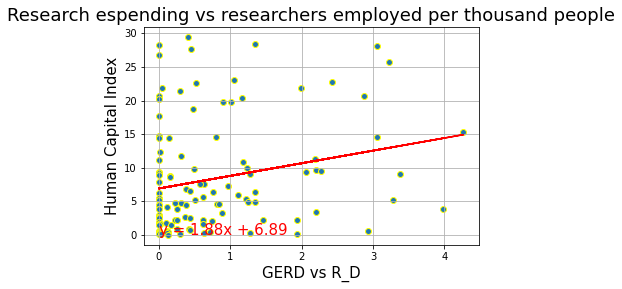

The r squared is: 0.22726856032039724


In [26]:
y_values = correlation_spending_research['number_per_thousand']
x_values = correlation_spending_research['gerd_percent']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
correlation_spending_research = plt.scatter(x_values,y_values,marker='o',edgecolors='yellow')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,0),fontsize=15,color='red')
plt.grid()
plt.title('Research espending vs researchers employed per thousand people',size=18)
plt.xlabel('GERD vs R_D',size=15)
plt.ylabel('Human Capital Index',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')
#plt.savefig('Images/correlation.png')

### Ploting bar graph of countries with more than 10 people per thousand inhabitants employed in research and development activities as registered in UNESCO stats site.

In [27]:
compare_spending_research = pd.merge(TotalRD_Clean_df, GERD_clean_df, how="left", on=["country"])

compare_spending_research = pd.DataFrame(compare_spending_research)
#number_per_thousand = compare_spending_research.astype(float)
#hci.dtypes
compare_spending_research = compare_spending_research.drop (['year_y'], axis = 1)
compare_spending_research = compare_spending_research.drop (['indicator'], axis = 1)
compare_spending_research = compare_spending_research.drop (['gerd_ind'], axis = 1)
compare_spending_research = compare_spending_research.drop (['gerd_percent'], axis = 1)
#compare_spending_research['number_per_thousand'] = compare_spending_research['number_per_thousand'].astype(float)
compare_spending_research = compare_spending_research.sort_values("number_per_thousand", ascending=False)
compare_spending_research.head()


,country,year_x,number_per_thousand
71,New Zealand,2015,9.90695
89,Romania,2015,9.78903
40,Iceland,2015,9.59346
29,France,2015,9.50578
59,Malawi,2015,9.35414


In [28]:
compare_spending_research.count()


country                115
year_x                 115
number_per_thousand    115
dtype: int64

In [29]:
compare_spending_research.dtypes


country                object
year_x                  int64
number_per_thousand    object
dtype: object

### Converting data types and replacing data errors

In [30]:
compare_spending_research.loc[compare_spending_research.country == "Democratic Republic of the Congo", "number_per_thousand"] = "2.946367"

In [31]:
compare_spending_research.loc[compare_spending_research.country == "Sudan (pre-secession)", "number_per_thousand"] = "0.0"

In [32]:
compare_spending_research.loc[compare_spending_research.country == "Sri Lanka", "number_per_thousand"] = "0.25722"

In [33]:
compare_spending_research['number_per_thousand'] = pd.to_numeric(compare_spending_research['number_per_thousand'])

In [34]:
compare_spending_research.dtypes

country                 object
year_x                   int64
number_per_thousand    float64
dtype: object

In [35]:
high_ranking = compare_spending_research[(compare_spending_research['number_per_thousand'] >= 10.0)]

### Bar graph top countries research employed per thousand inhabitants

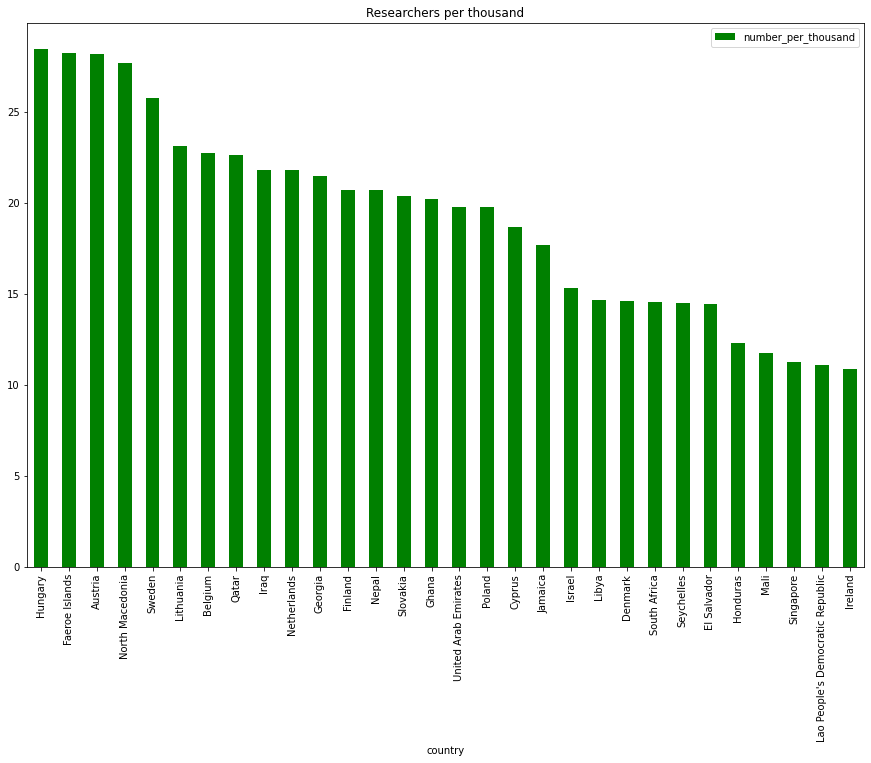

<Figure size 432x288 with 0 Axes>

In [36]:
high_ranking.plot(x= 'country', y='number_per_thousand',kind="bar", figsize=(15,10), color = 'green')

# Set a title for the chart
plt.title("Researchers per thousand")

plt.show()
plt.tight_layout()

### Create database connection

In [37]:
connection_string = "postgres:@localhost:5432/unesco_db"
engine = create_engine(f'postgresql://{connection_string}')

In [38]:
# Confirm tables
engine.table_names()

/var/folders/6x/83dn3sr912jd1wjj53dxy4140000gn/T/ipykernel_29990/3015872754.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['rd', 'edu', 'gerd']

### Load DataFrames into database

In [39]:
GDP_clean_df.to_sql(name='edu', con=engine, if_exists='append', index=True)

In [40]:
GERD_clean_df.to_sql(name='gerd', con=engine, if_exists='append', index=True)

In [41]:
TotalRD_Clean_df.to_sql(name='rd', con=engine, if_exists='append', index=True)

# SQL Queries

In [42]:
pd.read_sql_query('select count(*)from gerd', con=engine)

,count
0,136


In [43]:
pd.read_sql_query('select * from gerd', con=engine).head()

,index,country,gerd_ind,indicator,year,gerd_percent
0,1446,Australia,EXPGDP_TOT,GERD as a percentage of GDP,2015,1.91918
1,1450,Austria,EXPGDP_TOT,GERD as a percentage of GDP,2015,3.04969
2,1457,Belgium,EXPGDP_TOT,GERD as a percentage of GDP,2015,2.42817
3,1463,Canada,EXPGDP_TOT,GERD as a percentage of GDP,2015,1.69324
4,1470,Czechia,EXPGDP_TOT,GERD as a percentage of GDP,2015,1.92923


In [44]:
pd.read_sql_query('select edu.country,  edu.edu_percent, gerd.gerd_percent from edu inner join gerd on edu.country = gerd.country;', con=engine).head()


,country,edu_percent,gerd_percent
0,Chile,4.87531,0.38073
1,India,3.28573,0.69310
2,Portugal,4.88554,1.24330
3,United Kingdom of Great Britain and Northern I...,5.55305,1.64985
4,Germany,4.85515,2.93003


In [45]:
df=pd.read_sql_query('select edu.country,  edu.edu_percent, gerd.gerd_percent from edu inner join gerd on edu.country = gerd.country;', con=engine)


In [46]:
df

,country,edu_percent,gerd_percent
0,Chile,4.87531,0.38073
1,India,3.28573,0.69310
2,Portugal,4.88554,1.24330
3,United Kingdom of Great Britain and Northern I...,5.55305,1.64985
4,Germany,4.85515,2.93003
...,...,...,...
75,Philippines,3.33000,0.15683
76,Armenia,2.80591,0.25002
77,Romania,3.10963,0.48793
78,Pakistan,2.65002,0.24605
